# Статистический анализ сервиса аренды самокатов GoFast

В нашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.<br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

## Шаг 1. Загрузка данных

**Импортируем библиотеку Pandas. Считаем данные из csv-файла в датафреймы и сохраним в переменные. Выведем несколько первых строк каждого датафрейма и изучим общую информацию о каждом датафрейме.<br>
В качестве разделителя используем `,`**

In [1]:
import pandas as pd
data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

**Изучим общую информацию о полученном датафрейме `data_users`.**

In [2]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Выведем первые строки датафрейма `data_users`.**

In [3]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**Изучим общую информацию о полученном датафрейме `data_rides`.**

In [4]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Выведем первые строки датафрейма `data_rides`.**

In [5]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


**Изучим общую информацию о полученном датафрейме `data_subscriptions`.**

In [6]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [7]:
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Шаг 2. Предобработка данных

**Пропуски во всех датафремах отсутствуют, что говорит о высоком качестве работы по сбору данных. Исправим некоторые шероховатости.<br>
Установим корректный тип данных столбцу `data` датафрема `data_rides`. Там явно указан тип даты, а не `object`.**

In [8]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

**Создадим новый столбец `date_month` с номером месяца в основе столбца `date`.**

In [9]:
data_rides['date_month'] = data_rides['date'].dt.month
data_rides['date_month'].head()

0    1
1    1
2    4
3    8
4    8
Name: date_month, dtype: int64

In [10]:
print(data_rides['date'].min())
print(data_rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


In [11]:
print(data_users.duplicated().sum())
print(data_rides.duplicated().sum())

31
0


In [12]:
data_users.drop_duplicates(inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


## Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках.<br>
Для начала выведем частоту встречаемости городов.**

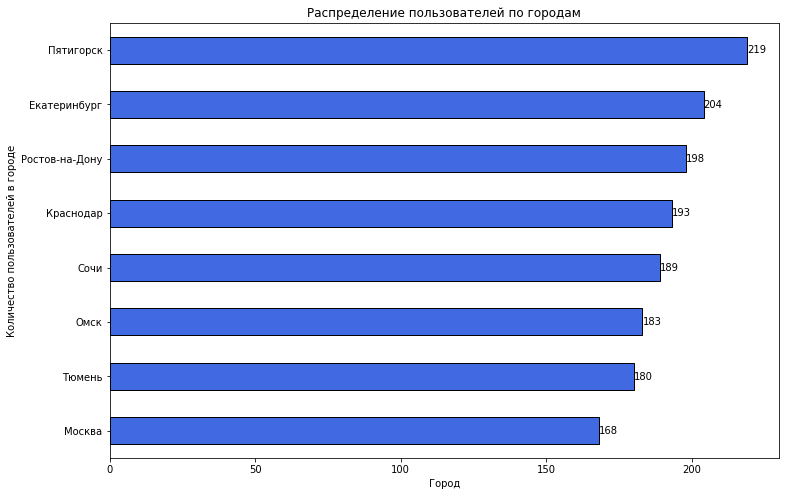

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
data_users['city'].value_counts().sort_values().plot.barh(color='royalblue', edgecolor='black')

for index, value in enumerate(data_users['city'].value_counts().sort_values()):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.xlabel('Город')
plt.ylabel('Количество пользователей в городе')
plt.title('Распределение пользователей по городам')

plt.show()

Присутствуют данные о пользователях из восьми городов. Количество записей для каждого города варьируется около 200.

**Выведем соотношение пользователей с подпиской и без.**

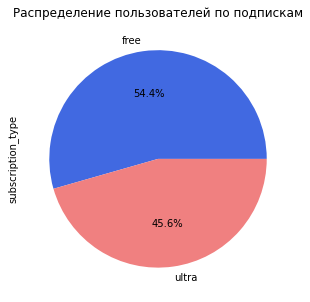

In [14]:
plt.figure(figsize=(9, 5))
data_users['subscription_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['royalblue', 'lightcoral'])

plt.title('Распределение пользователей по подпискам')

plt.show()

Соотношение пользователей по подпискам примерно равно и варьируется около 800.

**Выведем соотношение пользователей по возрасту.**

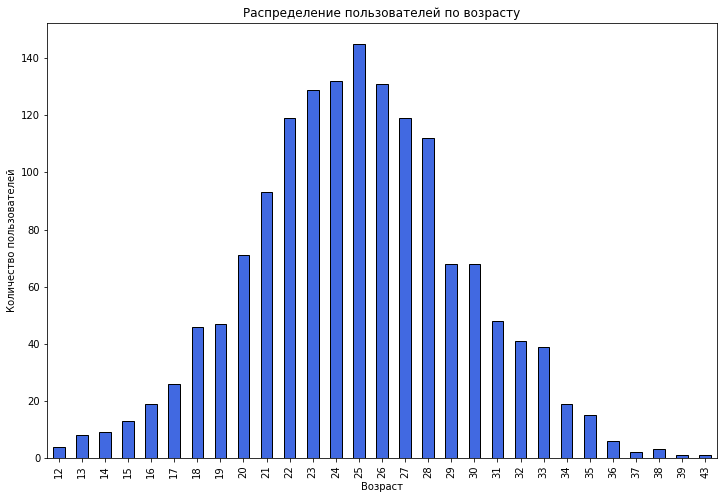

In [15]:
plt.figure(figsize=(12, 8))
data_users['age'].value_counts().sort_index().plot.bar(color='royalblue', edgecolor='black')

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')

plt.show()

In [16]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Выведем соотношение пользователей по преодоленному расстоянию.**

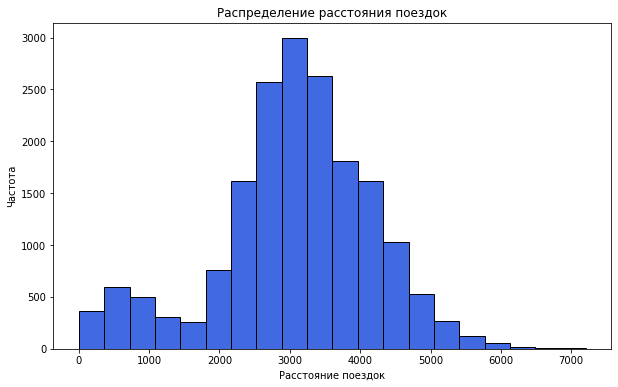

In [17]:
plt.figure(figsize=(10, 6))
data_rides['distance'].plot.hist(bins=20, color='royalblue', edgecolor='black')

plt.xlabel('Расстояние поездок')
plt.ylabel('Частота')
plt.title('Распределение расстояния поездок')

plt.show()

По графику видим нормальное распределение со средней дистанцией в 3 км.

**Выведем соотношение пользователей по продолжительности поездок.**

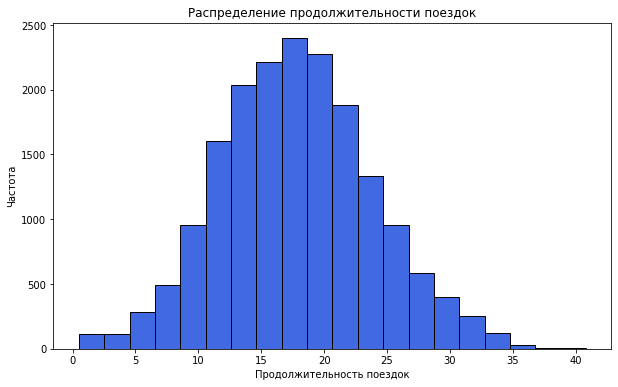

In [18]:
plt.figure(figsize=(10, 6))
data_rides['duration'].plot.hist(bins=20, color='royalblue', edgecolor='black')

plt.xlabel('Продолжительность поездок')
plt.ylabel('Частота')
plt.title('Распределение продолжительности поездок')

plt.show()

Средняя продолжительность поездки составляет около 15-20 минут.

## Шаг 4. Объединение данных

**Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом `merge()`.<br>
Выведем несколько первых строк.**

In [19]:
merged_table = pd.merge(data_rides, data_users, on='user_id')
data = pd.merge(merged_table, data_subscriptions, on='subscription_type')
data.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
None


**Создадим из полученного датафрейма 2 новых:**
- Пользователи с подпиской
- Пользователи без подписки

**Выведем несколько первых строк.**

In [21]:
data_users_free = data.query('subscription_type == "free"')
data_users_free.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [22]:
data_users_ultra = data.query('subscription_type == "ultra"')
data_users_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   date_month         6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


**Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

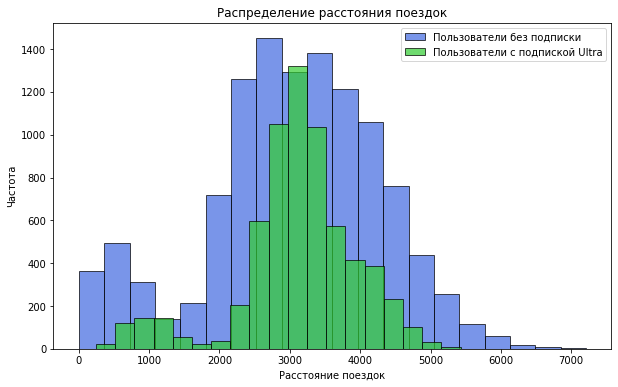

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64
3114.648464847295
3148.6372291760854


In [23]:
def plot_histogram(data1, data2, title1, title2):
    plt.figure(figsize=(10, 6))

    plt.hist(data1['distance'], bins=20, color='royalblue', edgecolor='black', alpha=0.7, label=title1)

    plt.hist(data2['distance'], bins=20, color='limegreen', edgecolor='black', alpha=0.7, label=title2)

    plt.xlabel('Расстояние поездок')
    plt.ylabel('Частота')
    plt.title('Распределение расстояния поездок')
    plt.legend()
    plt.show()

plot_histogram(data_users_free, data_users_ultra, 'Пользователи без подписки', 'Пользователи с подпиской Ultra')
print(data_users_free['distance'].describe())
print(data_users_ultra['distance'].describe())
print(data_users_free['distance'].median())
print(data_users_ultra['distance'].median())

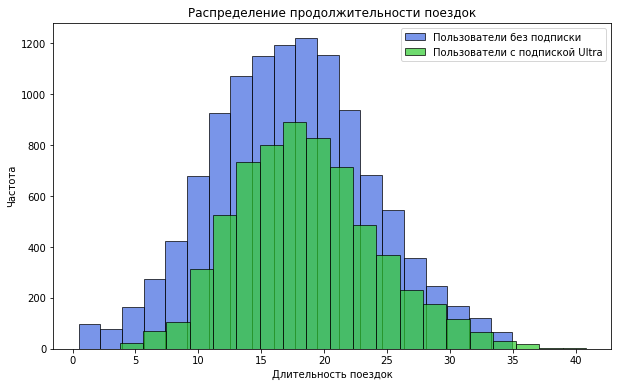

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64
17.326890226082043
18.17815320055055


In [24]:
def plot_histogram(data1, data2, title1, title2):
    plt.figure(figsize=(10, 6))

    plt.hist(data1['duration'], bins=20, color='royalblue', edgecolor='black', alpha=0.7, label=title1)

    plt.hist(data2['duration'], bins=20, color='limegreen', edgecolor='black', alpha=0.7, label=title2)

    plt.xlabel('Длительность поездок')
    plt.ylabel('Частота')
    plt.title('Распределение продолжительности поездок')
    plt.legend()
    plt.show()

plot_histogram(data_users_free, data_users_ultra, 'Пользователи без подписки', 'Пользователи с подпиской Ultra')
print(data_users_free['duration'].describe())
print(data_users_ultra['duration'].describe())
print(data_users_free['duration'].median())
print(data_users_ultra['duration'].median())

## Шаг 5. Подсчёт выручки

**Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Затем добавим столбец с помесячной выручкой, которую принёс каждый пользователь.**

In [25]:
import numpy as np

data['duration'] = np.ceil(data['duration'])

rides_df = data.groupby(['user_id', 'date_month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'name' : 'count',
    'minute_price' : 'first',
    'start_ride_price' : 'first',
    'subscription_fee' : 'first',
}).reset_index()

rides_df.columns = ['user_id', 'date_month', 'total_distance', 'total_duration', 'trip_count', 'minute_price', 'start_ride_price', 'subscription_fee']

def revenue_func (row):    
    return row['minute_price'] * row['total_duration'] + row['start_ride_price'] * row['trip_count'] + row['subscription_fee']
    
rides_df['revenue'] = rides_df.apply(revenue_func, axis=1)
rides_df.head(10)

,user_id,date_month,total_distance,total_duration,trip_count,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,6,0,199,451.0
1,1,4,754.159807,7.0,1,6,0,199,241.0
2,1,8,6723.470560,46.0,2,6,0,199,475.0
3,1,10,5809.911100,32.0,2,6,0,199,391.0
4,1,11,7003.499363,56.0,3,6,0,199,535.0
5,1,12,6751.629942,28.0,2,6,0,199,367.0
6,2,3,10187.723006,63.0,3,6,0,199,577.0
7,2,4,6164.381824,40.0,2,6,0,199,439.0
8,2,6,3255.338202,14.0,1,6,0,199,283.0
9,2,7,6780.722964,48.0,2,6,0,199,487.0


## Шаг 6. Проверка гипотез

**Проверим гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.<br> Для этого воспользуемся библиотекой `scipy`. Сформулируем гипотезу:**

- H0 : Пользователи с подпиской тратят столько же времени на поездки сколько пользователи без подписки.
- H1 : Пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки.

In [26]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(data_users_ultra['duration'], data_users_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Таким образом, можно сделать вывод, что средняя длительность поездок для пользователей с подпиской статистически значимо больше, чем для пользователей без подписки.<br> Простыми словами: пользователи с подпиской катаются дольше.

**Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров. Сформулируем гипотезу:**

- H0 : Пользователи с подпиской проезжают в среднем 3130 метров.
- H1 : Пользователи с подпиской проезжают больше 3130 метров.

In [27]:
value = 3130

alpha = 0.05

results = st.ttest_1samp(data_users_ultra['distance'], value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сравним среднее значение выручки пользователей с подпиской и без.**

- H0 : Пользователи с подпиской приносят выручки столько же сколько пользователи без подписки.
- H1 : Пользователи с подпиской приносят выручки больше чем пользователи с подпиской.

In [28]:
alpha = 0.05

revenue_users_ultra = rides_df['revenue'][rides_df['user_id'].isin(data_users_ultra['user_id'])]
revenue_users_free = rides_df['revenue'][rides_df['user_id'].isin(data_users_free['user_id'])]

results = st.ttest_ind(revenue_users_ultra, revenue_users_free, alternative='greater')

revenue_users_ultra_mean = revenue_users_ultra.mean() 
revenue_users_free_mean = revenue_users_free.mean() 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Среднее значение выручки пользователей без подписки: ', revenue_users_free_mean)
print('Среднее значение выручки пользователей с подпиской: ', revenue_users_ultra_mean)

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
Среднее значение выручки пользователей без подписки:  328.6413651073845
Среднее значение выручки пользователей с подпиской:  362.7921906022502


**Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.** 

## Шаг 7. Распределения

**Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.** 

**Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.**

Минимальное количество промокодов (n): 1161


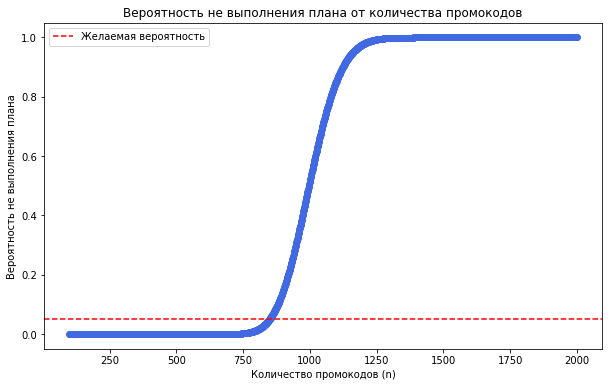

In [29]:
from scipy.stats import binom

# Заданные параметры
p_success = 0.10  # Вероятность успеха (продление подписки)
desired_successes = 100  # Минимальное количество успешных продлений подписки
desired_failure_prob = 0.05  # Желаемая вероятность не выполнения плана

# Подбор оптимального n
n_values = np.arange(100, 2000, 1)
failure_probs = []
min_found = None

for n in n_values:
    failure_prob = binom.cdf(desired_successes - 1, n, p_success)
    failure_probs.append(1 - failure_prob)

    if failure_prob <= desired_failure_prob and min_found == None:
        min_found = n
        print("Минимальное количество промокодов (n):", min_found)
        

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, failure_probs, marker='o', linestyle='-', color='royalblue')
plt.axhline(desired_failure_prob, color='red', linestyle='--', label='Желаемая вероятность')
plt.title('Вероятность не выполнения плана от количества промокодов')
plt.xlabel('Количество промокодов (n)')
plt.ylabel('Вероятность не выполнения плана')
plt.legend()
plt.show()

# Общий вывод по проекту
    
   Анализ данных проведен на выборке, включающей 1534 пользователей. Выявлено и успешно устранено 31 дубликат. В качестве целевой аудитории для сервиса были определены пользователи в возрасте от 20 до 30 лет.

Изучение предоставленных данных показало, что пользователи без подписки чаще предпочитают короткие поездки по сравнению с пользователями, обладающими подпиской. Особенно актуально это наблюдение для пользователей с возрастом от 20 до 30 лет.

Пользователи, обладающие подпиской, в среднем проезжают менее 3.13 км. Это свидетельствует о том, что расстояние, которое они преодолевают, находится в оптимальных пределах с точки зрения износа самокатов. Следовательно, можно заключить, что уровень износа самокатов данными пользователями не завышен и соответствует нормативам.    
    
Также установлено, что пользователи с подпиской в среднем приносят больше выручки, превышая выручку от пользователей без подписки на приблизительно 40 рублей. Эта информация является ключевой для определения максимально допустимой стоимости привлечения одного пользователя с учетом экономической целесообразности.

Необходимо отметить, что на текущий момент две трети пользователей сервиса не обладают подпиской, что создает потенциальные перспективы для их привлечения. Учитывая вышеуказанные финансовые параметры, эффективные маркетинговые стратегии должны быть разработаны с учетом привлечения этой значительной части пользовательской базы, при условии, что затраты на привлечение не превысят усредненную выручку от подписанных пользователей.
    